# Digit Recognizer



(1) Fitting a random forest classifier using the full set of 784 explanatory variables and the model training set (train.csv). Recording the time it takes to fit the model and then evaluate the model on the test.csv data

(2) Executing principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. Recording the time it takes to identify the principal components.

(3) Using the identified principal components from step (2), use the train.csv to build another random forest classifier. Recording the time it takes to fit the model and to evaluate the model on the test.csv data 


(4) Using k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels. 


Reporting total elapsed time measures for the training set analysis. 

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

# import base packages into the namespace for this program
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import subprocess
import pandas as pd

#SKlearn
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, classification_report

In [4]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 85

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
# mnist

In [6]:
# mnist = pd.read_csv(r"C:\Users\hdfer\OneDrive\Desktop\Henry\Uchicago\Quarter 3\Machine Learning & Predictive Analytics\Unsupervised Learning Assignment\data\train.csv")

##### Fitting a random forest classifier using the full set of 784 explanatory variables and the model training set (train.csv). Recording the time it takes to fit the model and then evaluate the model on the test.csv data

In [7]:
#Split training data (60,000) and test data (10,000)
split = 60000
X_train, X_test = mnist["data"][:split], mnist["data"][split:]
y_train, y_test = mnist["target"][:split], mnist["target"][split:]

In [8]:
# Check the shape of the trainig data set array
print('Shape of X_train_data:', X_train.shape, X_test.shape)
print('Shape of y_train_data:', y_train.shape, y_test.shape)

Shape of X_train_data: (60000, 784) (10000, 784)
Shape of y_train_data: (60000,) (10000,)


In [9]:
# Shuffle the training set so that all cross-validation folds will be similar.

shuffle = np.random.permutation(split)
X_train, y_train = X_train.iloc[shuffle], y_train[shuffle]

In [10]:
#RANDOM FOREST with MNIST data set (no PCA)
start_RF = time.time() #Record start time of RANDOM FOREST Process

RF_clf = RandomForestClassifier(
  bootstrap = True,
  n_estimators=10,
  max_features='sqrt', 
  random_state=RANDOM_SEED
)
RF_clf.fit(X_train, y_train)


# Evaluate a score of RANDOM FOREST by cross-validation
print("crossval score: ", cross_val_score(
  RF_clf, 
  X_train, y_train, 
  cv=10, 
  scoring='f1_macro'
))



#Generate cross-validated estimates for each input data point
y_pred = cross_val_predict(
  RF_clf,
  X_test, y_test,
  cv=10
)

# Show Precision, Recall and F1-Score
print("classification report: ", classification_report(y_test, y_pred))


# Calculate Average F1 Score
f1score_RF_clf = f1_score(y_test, y_pred, average='macro')
print("f1: ", f1score_RF_clf)



#Elapsed Time to perform Random Forest
stop_RF = time.time()
time_RF = stop_RF - start_RF

print("---------------------------------")
print('Runtime for Random Forest:', time_RF)

crossval score:  [0.94328771 0.94674126 0.94559927 0.94663835 0.94665671 0.94360587
 0.94070418 0.94544587 0.94898774 0.94044584]
classification report:                precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.94      0.98      0.96      1135
           2       0.89      0.91      0.90      1032
           3       0.85      0.90      0.87      1010
           4       0.88      0.92      0.90       982
           5       0.89      0.84      0.86       892
           6       0.93      0.92      0.93       958
           7       0.93      0.90      0.92      1028
           8       0.91      0.83      0.87       974
           9       0.90      0.85      0.87      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

f1:  0.9027042584259733
---------------------------------
Runtime for Random Forest: 43

In [11]:
#Confusion Matrix for RANDOM FOREST with MNIST data set (no PCA)
cm_RF_clf = confusion_matrix(y_test, y_pred)
cm_RF_clf

array([[ 955,    1,    0,    2,    0,    6,    8,    2,    6,    0],
       [   0, 1117,    6,    2,    0,    2,    3,    0,    4,    1],
       [  15,    3,  937,   13,   15,    4,   15,   15,   10,    5],
       [   3,    6,   28,  905,    1,   23,    3,    8,   25,    8],
       [   3,    3,    7,    5,  905,    3,    9,    2,    6,   39],
       [  16,    8,    5,   69,    8,  745,   11,    6,   13,   11],
       [  16,    6,   13,    5,   10,   17,  882,    1,    8,    0],
       [   5,   16,   25,    7,   17,    2,    1,  927,    2,   26],
       [   5,   18,   27,   39,   13,   25,   14,   12,  811,   10],
       [  11,    8,    9,   17,   58,   13,    1,   22,   11,  859]],
      dtype=int64)

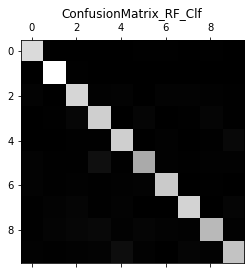

In [12]:
# Confusion Matrix Plot for RANDOM FOREST with MNIST data set (no PCA)
plt.matshow(cm_RF_clf, cmap=plt.cm.gray)
plt.title('ConfusionMatrix_RF_Clf')
plt.show()

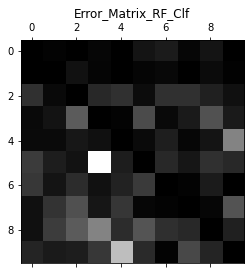

In [12]:
# Error Plot for RANDOM FOREST with MNIST data set (no PCA) 
rws = cm_RF_clf.sum(axis=1, keepdims=True)
norm = cm_RF_clf / rws

np.fill_diagonal(norm, 0)
plt.matshow(norm, cmap=plt.cm.gray)
plt.title('Error_Matrix_RF_Clf')
plt.show()

##### Executing principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. Recording the time it takes to identify the principal components.

In [13]:
# PRINCIPAL COMPONENT ANALYSIS: 95% of variablity

start_pca = time.time()
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

 #Ok it takes about 155 components to represent 95% variance

end_pca = time.time()
pca_time = end_pca - start_pca
print("PCA Time: ", pca_time)
print(d)
#print(cumsum)

PCA Time:  2.5932722091674805
154


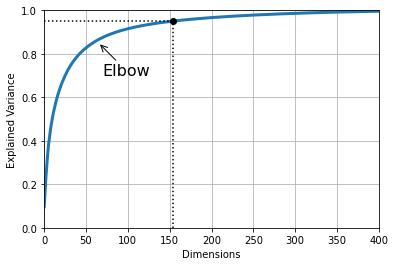

In [14]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [15]:
#APPLY PCA TRANSFORMATIONS

pca = PCA(n_components=0.95)


X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)
X_reduced_pca = X_reduced

print('pca n_components: ', pca.n_components_)
np.sum(pca.explained_variance_ratio_)


X_reduced_test = pca.fit_transform(X_test)
X_reduced_pca_test = X_reduced_test

pca n_components:  154


##### Using the identified principal components from step (2), use the train.csv to build another random forest classifier. Recording the time it takes to fit the model and to evaluate the model on the test.csv data 


In [16]:
# RANDOM FOREST on Dimension Reduced Data (PCA:95% variability)

pca_clf_start = time.time()

pca_RF_clf = RandomForestClassifier(
  bootstrap = True,
  n_estimators=10,
  max_features='sqrt', 
  random_state=RANDOM_SEED
)

pca_RF_clf.fit(X_reduced_pca, y_train)


print("crossval score: ", cross_val_score(
  pca_RF_clf, 
  X_reduced_pca, y_train, 
  cv=10, 
  scoring='f1_macro'
))


y_pred_pca = cross_val_predict(
  pca_RF_clf,
  X_reduced_pca_test, y_test,
  cv=10
)

# Precision, Recall and F1-Score

print("classification report: ", classification_report(y_test, y_pred_pca))


f1score_pca_RF_clf = f1_score(y_test, y_pred_pca, average='macro')
print("f1: ", f1score_pca_RF_clf)

print("-------------------------------------")
pca_clf_end = time.time()
pca_clf_time = pca_clf_end - pca_clf_start
print("time: ", pca_clf_time)

crossval score:  [0.88355535 0.88536463 0.89098446 0.89044228 0.88970069 0.8888803
 0.87966523 0.88238962 0.89053846 0.89042327]
classification report:                precision    recall  f1-score   support

           0       0.79      0.91      0.84       980
           1       0.93      0.98      0.95      1135
           2       0.74      0.81      0.77      1032
           3       0.73      0.77      0.75      1010
           4       0.77      0.82      0.80       982
           5       0.72      0.65      0.68       892
           6       0.90      0.85      0.87       958
           7       0.86      0.84      0.85      1028
           8       0.78      0.66      0.71       974
           9       0.83      0.72      0.77      1009

    accuracy                           0.81     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.81      0.81      0.80     10000

f1:  0.800682813613046
-------------------------------------
time:  92.25414514541626


##### Comparing test set performance across the two modeling approaches: original 784-variable model versus the 95-percent-PCA model. Also evaluate the time required to perform (1) versus the time required to perform (2) and (3) together. Ensuring that accurate measures are made of the total time it takes to execute each of the modeling approaches in training the models. 

### Comparing Test Set Performances:
The original, 784-variable model performs better on the test set than the pca-model. the original model performs at around 90% accuracy whereas the pca model performs closer to 80-81% accuracy, this is a considerable drop off in performance.

### Comparing Performance Times:
The original model is fit, run and evaluated in approximately 15 seconds. As for the pca model, despite the fact that it is using far less features, the amount of time it takes to perform the pca, find the number of components, and run and evaluate the model takes far long at approximately 42 seconds. Despite being 3 cells longer, the pca code is run all at once to ensure that no time is lost when starting/stopping each cell. 




##### (5) Use k-means clustering to group MNIST observations into 1 of 10 categories and then assigninglabels. 

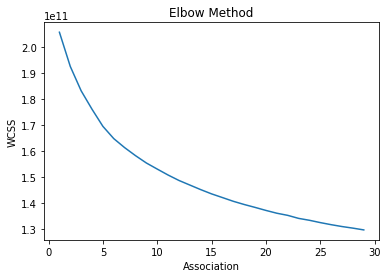

In [23]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [92]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


In [95]:
x_train = X_train.astype('float32') 
x_test = X_test.astype('float32')
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [96]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=10)

In [97]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)


MiniBatchKMeans(n_clusters=10)

In [98]:
kmeans.labels_

array([2, 7, 0, ..., 4, 5, 3])

In [99]:
def retrieve_info(cluster_labels,y_train):

# Initializing
    reference_labels = {}
# For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

In [100]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]

In [101]:
print(number_labels[:20])

[3. 0. 4. 1. 9. 6. 1. 3. 1. 8. 3. 1. 3. 6. 1. 8. 6. 8. 1. 8.]


In [102]:
print(y_train[:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [103]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.49995


Management Problem:
From a management perspective, the predictive accuracy of models must be weighed against the costs of model development and implementation. Suppose you were the manager of a data science team responsible for implementing models for computer vision (classification of images analogous to the MINST problem). Would you recommend using PCA as a preliminary to machine learning classification? Explain your thinking.


#### REPORT/FINDINGS: 
(1) A summary and problem definition for management; 

- Quality and accuracy of data results are of paramount importance for any analytics team. However, time is a valuable and sometimes costly resource as is computing power. The task at hand as is to create two multiclass random forest classifiers on the MNIST data set. One classifier being the MNIST data set without pre-processing and 700+ features, and the other being the same dataset with only the principal components included. In this experiment we are assessing the classifier's accuracy as well as the time it takes for each one to complete the task. 


(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed 

- For the first, original model. The training set is shuffled and a Random Forest classifier is fit on the 60,000 of the 70000 data points. Using CV = 10, we calculate the precision, recall, f1-score, and support as well as the average F1 Score. We start the run-time before the model is fit and end it after the results have printed. As for the PCA section, the same process is kept, however we first we calculate how many principal components will account for 95% of the variance, then we apply the fit_transform to the training set with the new reduced dataset. Run time is calculated in the same way. Then for K-means, despite being instructed to already use 10 clusters, I conducted the elobw method just for good practice. I clustered the mnist data set and compared the predicted labels to the actual labels. It was about 50% accuracy, not good at all. 


(3) Review of results with recommendations for management.

- Although incorporating PCA to reduce the large amount of features to promote model simplicity and improved run time seemed like a strong idea initially, the case is that the original (non-pca model) performs much better than the PCA model on top of running faster than the PCA model. It is my recommendation to management that, when working with the MNIST dataset, a random forest mutliclass classifier on the original model is the best way to proceed. 